In [32]:
import pandas as pd

# Load the data
trips = pd.read_csv('trips.csv')
transactions = pd.read_csv('transactions.csv')
routes = pd.read_csv('routes.csv')
stations = pd.read_csv('stations.csv')

In [33]:
# Calculate punctuality rate
punctuality_rate = trips['Journey Status'].value_counts(normalize=True) * 100
print("Punctuality Rate:")
print(punctuality_rate)

Punctuality Rate:
Journey Status
On Time      90.679885
Delayed       5.344472
Cancelled     3.975643
Name: proportion, dtype: float64


In [36]:
# Filter delayed trips
delayed_trips = trips[trips['Journey Status'].isin(['Delayed', 'Cancelled'])]

# Count reasons for delays
delay_reasons = delayed_trips['Reason for Delay'].value_counts()
print("Reasons for Delays:")
print(delay_reasons)

Reasons for Delays:
Reason for Delay
Weather Conditions    466
Staff Shortage        437
Signal Failure        424
Technical Issue       373
Traffic               152
Name: count, dtype: int64


In [38]:
# Group by route and count delayed trips
route_delays = trips[trips['Journey Status'].isin(['Delayed', 'Cancelled'])].groupby('Route').size().reset_index(name='Delayed/cancelled Trips')

# Sort by delayed trips
route_delays = route_delays.sort_values(by='Delayed/cancelled Trips', ascending=False)
print("Routes with Most Delays:")
print(route_delays.head())

Routes with Most Delays:
                                             Route  Delayed/cancelled Trips
33  Manchester Piccadilly to Liverpool Lime Street                      266
14          Liverpool Lime Street to London Euston                      223
34          Manchester Piccadilly to London Euston                      194
28                    London Paddington to Reading                      163
19          London Euston to Birmingham New Street                      156


In [40]:
# Group by departure station and count delayed trips
departure_station_delays = trips[trips['Journey Status'] == 'Delayed'].groupby('Departure Station').size().reset_index(name='Delayed Trips')

# Sort by delayed trips
departure_station_delays = departure_station_delays.sort_values(by='Delayed Trips', ascending=False)
print("Departure Stations with Most Delays:")
print(departure_station_delays.head())

# Group by arrival station and count delayed trips
arrival_station_delays = trips[trips['Journey Status'] == 'Delayed'].groupby('Arrival Destination').size().reset_index(name='Delayed Trips')

# Sort by delayed trips
arrival_station_delays = arrival_station_delays.sort_values(by='Delayed Trips', ascending=False)
print("Arrival Stations with Most Delays:")
print(arrival_station_delays.head())

Departure Stations with Most Delays:
       Departure Station  Delayed Trips
6  Manchester Piccadilly            408
2  Liverpool Lime Street            283
0  Birmingham New Street            109
3          London Euston             75
8                   York             44
Arrival Stations with Most Delays:
      Arrival Destination  Delayed Trips
6           London Euston            436
5   Liverpool Lime Street            156
9   Manchester Piccadilly            135
0   Birmingham New Street             59
13                   York             59


In [42]:
# Extract hour from departure time
trips['Departure Hour'] = pd.to_datetime(trips['Departure Time']).dt.hour

# Group by departure hour and count delayed trips
hourly_delays = trips[trips['Journey Status'] == 'Delayed'].groupby('Departure Hour').size().reset_index(name='Delayed Trips')

# Sort by delayed trips
hourly_delays = hourly_delays.sort_values(by='Delayed Trips', ascending=False)
print("Delays by Departure Hour:")
print(hourly_delays)

Delays by Departure Hour:
    Departure Hour  Delayed Trips
9               11            196
7                8            180
8                9            164
13              17            154
11              15            111
2                3             97
4                5             30
12              16             30
5                6             28
0                0             16
6                7             15
10              14             15
3                4             14
1                1             12


C:\Users\dramo\AppData\Local\Temp\ipykernel_32020\2281262451.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trips['Departure Hour'] = pd.to_datetime(trips['Departure Time']).dt.hour


In [43]:
# Group by day type and count delayed trips
day_type_delays = trips[trips['Journey Status'] == 'Delayed'].groupby('Day Type').size().reset_index(name='Delayed Trips')

# Sort by delayed trips
day_type_delays = day_type_delays.sort_values(by='Delayed Trips', ascending=False)
print("Delays by Day Type:")
print(day_type_delays)

Delays by Day Type:
  Day Type  Delayed Trips
0  Weekday            774
1  Weekend            288


In [46]:
# Group by route and sum CO2e emissions
route_emissions = routes.groupby('Route')['CO2e emissionss'].sum().reset_index()

# Sort by emissions
route_emissions = route_emissions.sort_values(by='CO2e emissionss', ascending=False)
print("Routes with Highest CO2e Emissionss:")
print(route_emissions.head())

Routes with Highest CO2e Emissionss:
                                         Route  CO2e emissionss
15    Edinburgh Waverley to London Kings Cross        23.468204
28    London Kings Cross to Edinburgh Waverley        23.444414
1           Birmingham New Street to Edinburgh        19.221803
20  Liverpool Lime Street to London Paddington        13.220937
43  Manchester Piccadilly to London Paddington        13.030622


In [48]:
# Group by departure station and count total trips, delayed trips, and cancelled trips
station_delays_cancellations = trips.groupby('Departure Station').agg(
    TotalTrips=('Journey Status', 'size'),
    DelayedTrips=('Journey Status', lambda x: (x == 'Delayed').sum()),
    CancelledTrips=('Journey Status', lambda x: (x == 'Cancelled').sum())
).reset_index()

# Calculate percentages
station_delays_cancellations['DelayedPercentage'] = (station_delays_cancellations['DelayedTrips'] / station_delays_cancellations['TotalTrips']) * 100
station_delays_cancellations['CancelledPercentage'] = (station_delays_cancellations['CancelledTrips'] / station_delays_cancellations['TotalTrips']) * 100

# Sort by delayed percentage
station_delays_cancellations = station_delays_cancellations.sort_values(by='DelayedPercentage', ascending=False)
print("Delays and Cancellations by Departure Station:")
print(station_delays_cancellations)

Delays and Cancellations by Departure Station:
        Departure Station  TotalTrips  DelayedTrips  CancelledTrips  \
2      Edinburgh Waverley          43            43               0   
9                  Oxford         129            15               5   
8   Manchester Piccadilly        3521           408             127   
3   Liverpool Lime Street        2997           283             104   
0   Birmingham New Street        1394           109              59   
11                   York         654            44              24   
4           London Euston        3059            75             123   
5      London Kings Cross        2625            43              94   
6       London Paddington        2643            42             137   
1    Bristol Temple Meads          15             0               0   
7       London St Pancras        2332             0              97   
10                Reading         459             0              20   

    DelayedPercentage  Cancel

In [49]:
# Group by route and count total trips, delayed trips, and cancelled trips
route_delays_cancellations = trips.groupby('Route').agg(
    TotalTrips=('Journey Status', 'size'),
    DelayedTrips=('Journey Status', lambda x: (x == 'Delayed').sum()),
    CancelledTrips=('Journey Status', lambda x: (x == 'Cancelled').sum())
).reset_index()

# Calculate percentages
route_delays_cancellations['DelayedPercentage'] = (route_delays_cancellations['DelayedTrips'] / route_delays_cancellations['TotalTrips']) * 100
route_delays_cancellations['CancelledPercentage'] = (route_delays_cancellations['CancelledTrips'] / route_delays_cancellations['TotalTrips']) * 100

# Sort by delayed percentage
route_delays_cancellations = route_delays_cancellations.sort_values(by='DelayedPercentage', ascending=False)
print("Delays and Cancellations by Route:")
print(route_delays_cancellations.head())

Delays and Cancellations by Route:
                                       Route  TotalTrips  DelayedTrips  \
64                         York to Wakefield          15            15   
27                     London Euston to York          16            16   
15  Edinburgh Waverley to London Kings Cross          43            43   
41    Manchester Piccadilly to London Euston         289           191   
19    Liverpool Lime Street to London Euston         363           205   

    CancelledTrips  DelayedPercentage  CancelledPercentage  
64               0         100.000000             0.000000  
27               0         100.000000             0.000000  
15               0         100.000000             0.000000  
41               3          66.089965             1.038062  
19              18          56.473829             4.958678  


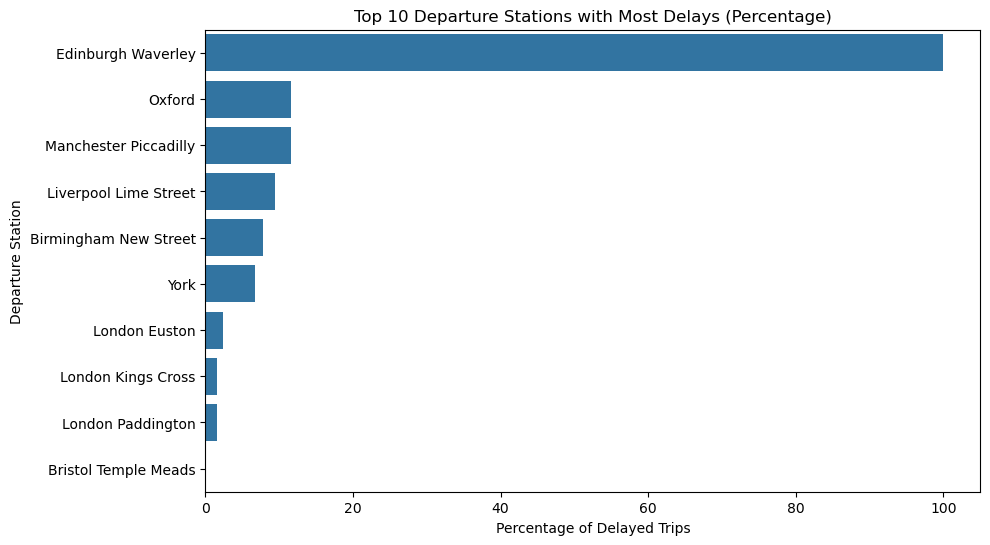

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Bar plot of delays and cancellations by departure station
plt.figure(figsize=(10, 6))
sns.barplot(x='DelayedPercentage', y='Departure Station', data=station_delays_cancellations.head(10))
plt.title('Top 10 Departure Stations with Most Delays (Percentage)')
plt.xlabel('Percentage of Delayed Trips')
plt.ylabel('Departure Station')
plt.show()

In [53]:
# Group by route and count total trips, delayed trips, and cancelled trips
route_delays_cancellations = trips.groupby('Route').agg(
    TotalTrips=('Journey Status', 'size'),
    DelayedTrips=('Journey Status', lambda x: (x == 'Delayed').sum()),
    CancelledTrips=('Journey Status', lambda x: (x == 'Cancelled').sum())
).reset_index()

# Calculate Delayed + Cancelled Ratio
route_delays_cancellations['DelayedCancelledRatio'] = (
    (route_delays_cancellations['DelayedTrips'] + route_delays_cancellations['CancelledTrips']) / 
    route_delays_cancellations['TotalTrips']
) * 100

# Sort by Delayed + Cancelled Ratio
route_delays_cancellations = route_delays_cancellations.sort_values(by='DelayedCancelledRatio', ascending=False)

In [54]:
# Filter delayed trips
delayed_trips = trips[trips['Journey Status'] == 'Delayed']

# Group by route and reason for delay
delay_reasons_by_route = delayed_trips.groupby(['Route', 'Reason for Delay']).size().reset_index(name='Count')

# Pivot the data for visualization
delay_reasons_pivot = delay_reasons_by_route.pivot(index='Route', columns='Reason for Delay', values='Count').fillna(0)

C:\Users\dramo\AppData\Local\Temp\ipykernel_32020\3464393841.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


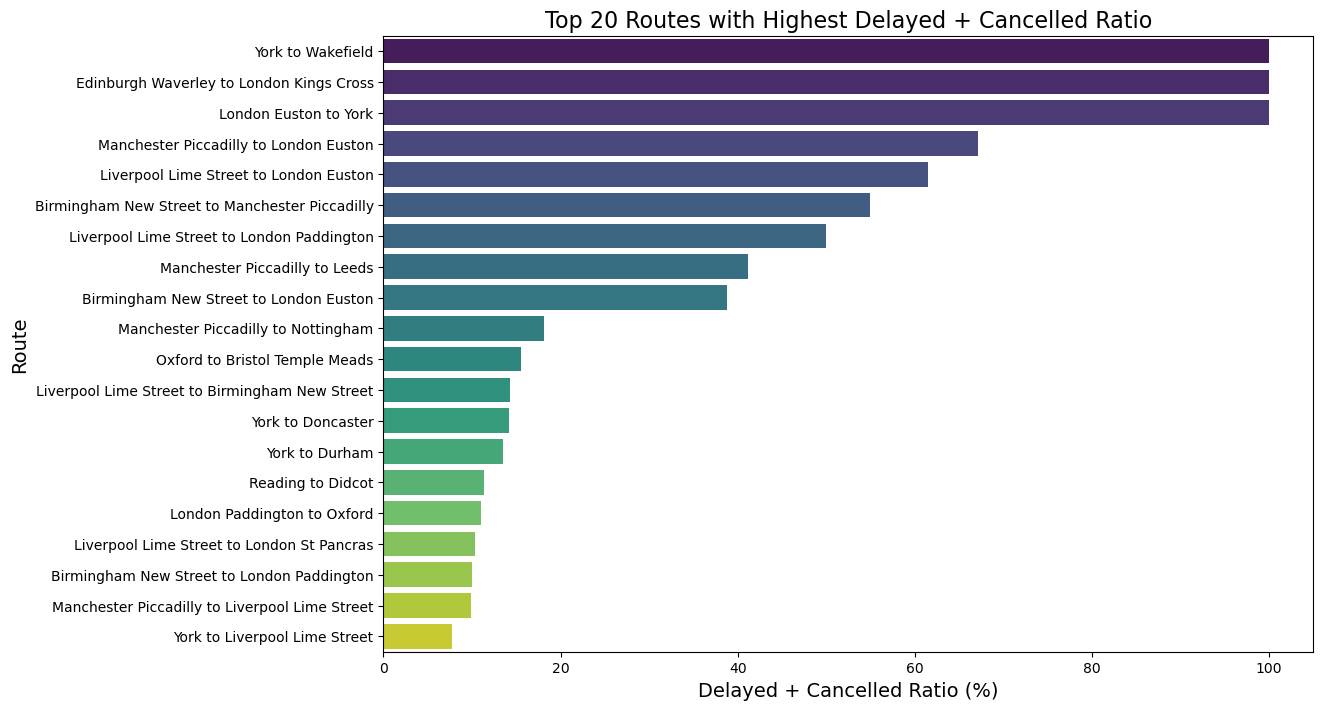

In [55]:
# Set up the plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='DelayedCancelledRatio', 
    y='Route', 
    data=route_delays_cancellations.head(20),  # Show top 20 routes
    palette='viridis'
)
plt.title('Top 20 Routes with Highest Delayed + Cancelled Ratio', fontsize=16)
plt.xlabel('Delayed + Cancelled Ratio (%)', fontsize=14)
plt.ylabel('Route', fontsize=14)
plt.show()

<Figure size 1400x800 with 0 Axes>

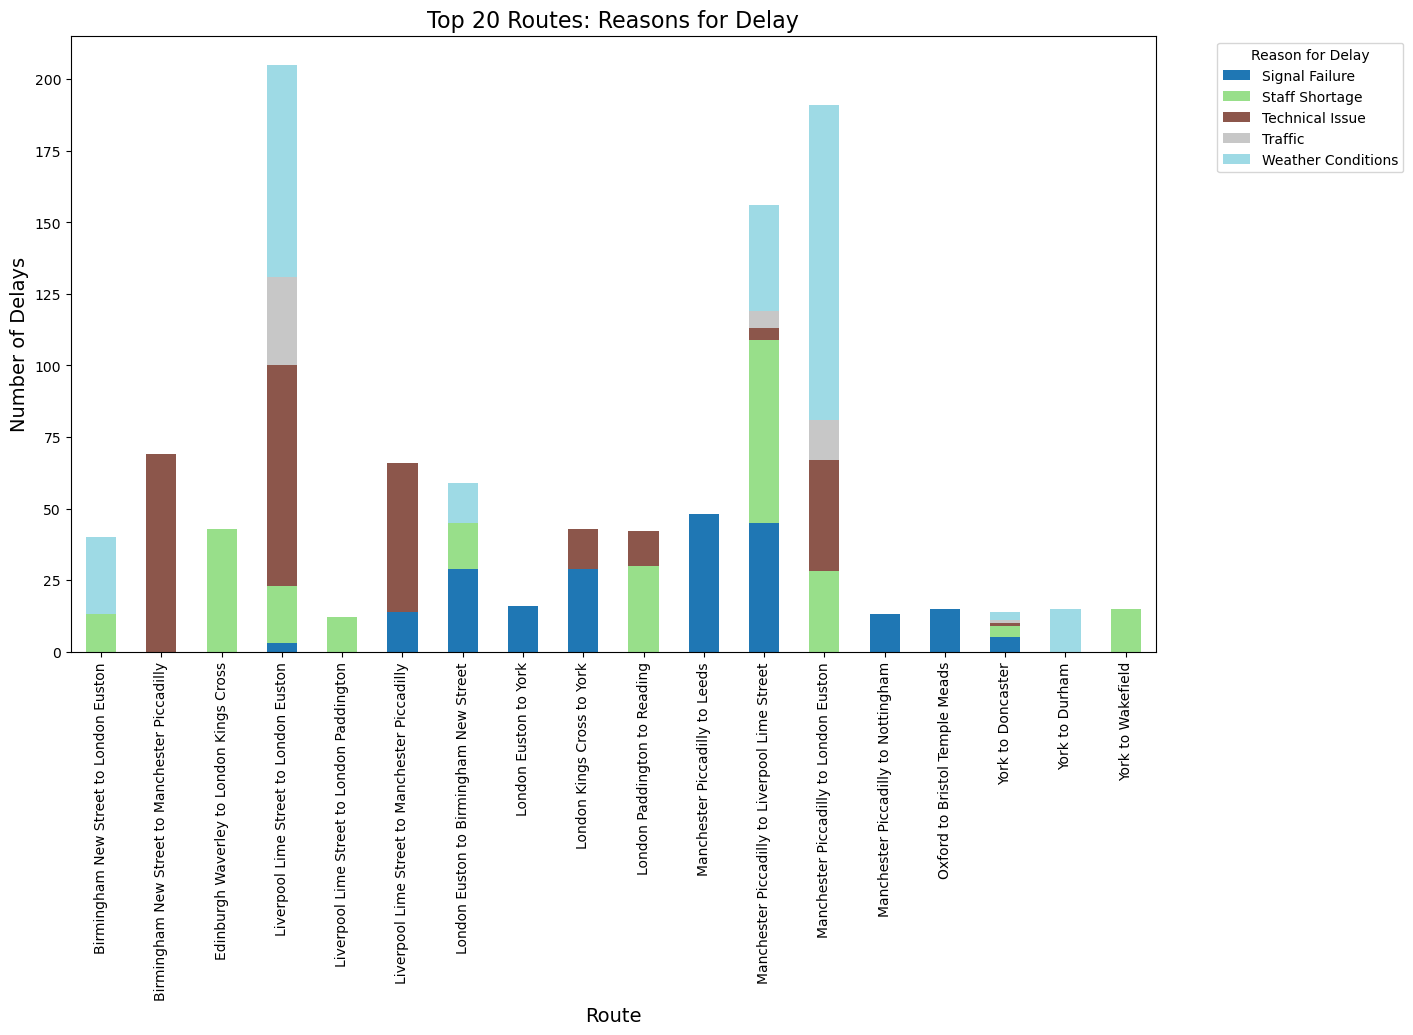

In [56]:
# Set up the plot
plt.figure(figsize=(14, 8))
delay_reasons_pivot.head(20).plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Top 20 Routes: Reasons for Delay', fontsize=16)
plt.xlabel('Route', fontsize=14)
plt.ylabel('Number of Delays', fontsize=14)
plt.legend(title='Reason for Delay', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

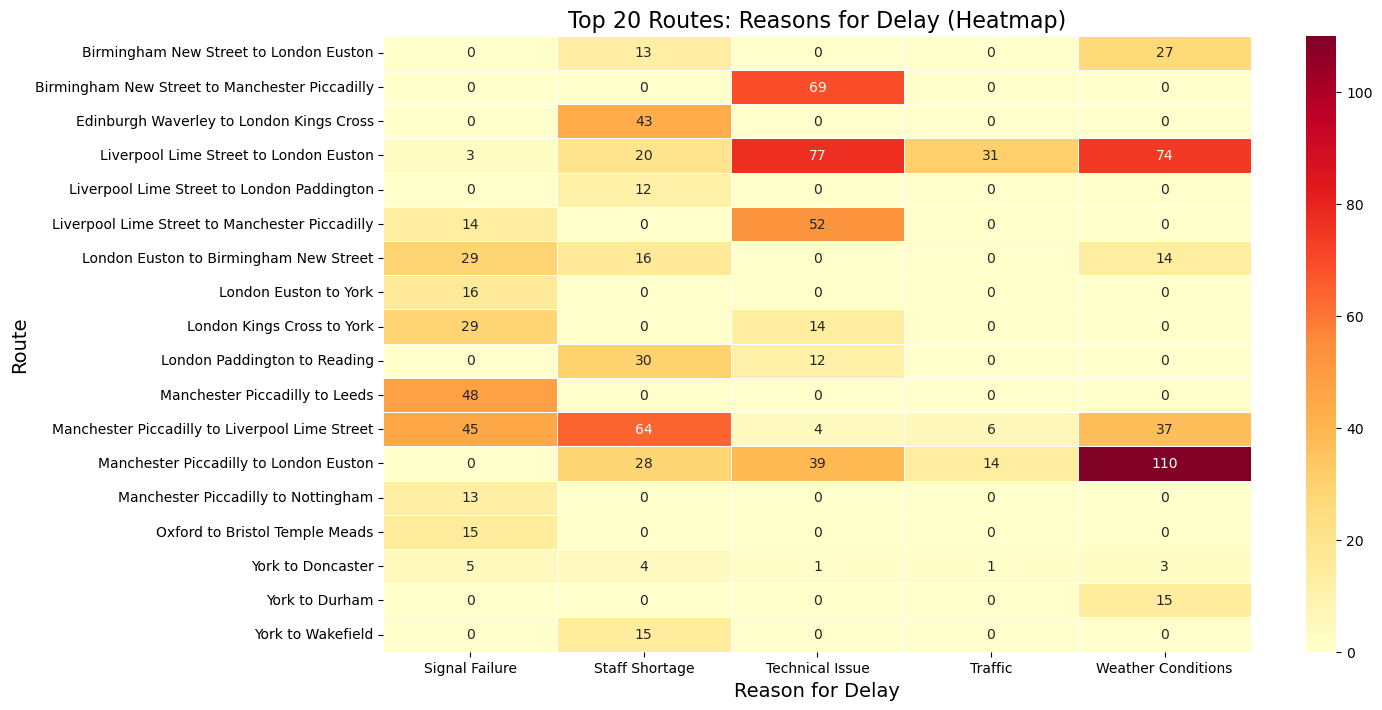

In [57]:
# Set up the plot
plt.figure(figsize=(14, 8))
sns.heatmap(
    delay_reasons_pivot.head(20), 
    annot=True, 
    fmt='g', 
    cmap='YlOrRd', 
    linewidths=0.5
)
plt.title('Top 20 Routes: Reasons for Delay (Heatmap)', fontsize=16)
plt.xlabel('Reason for Delay', fontsize=14)
plt.ylabel('Route', fontsize=14)
plt.show()

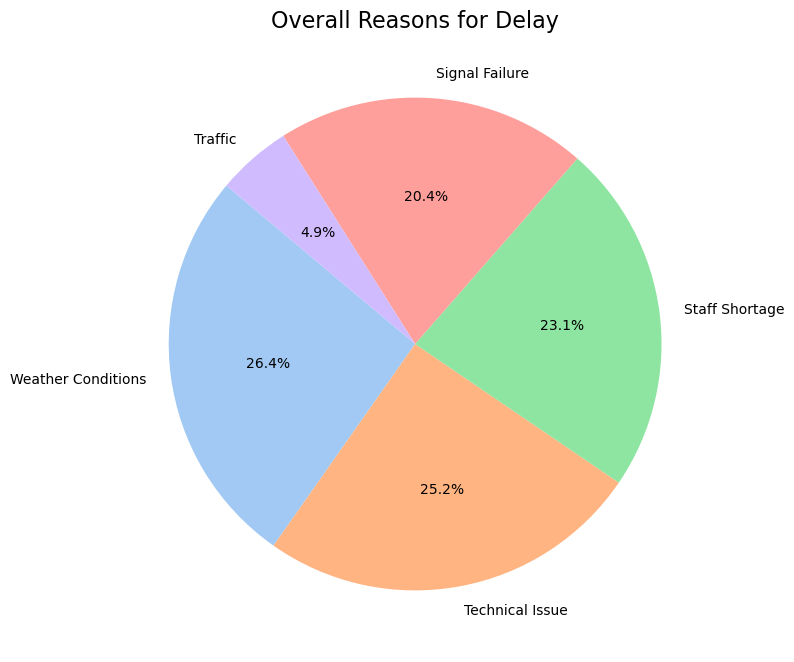

In [58]:
# Calculate overall reasons for delay
overall_delay_reasons = delayed_trips['Reason for Delay'].value_counts()

# Set up the plot
plt.figure(figsize=(8, 8))
plt.pie(
    overall_delay_reasons, 
    labels=overall_delay_reasons.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel')
)
plt.title('Overall Reasons for Delay', fontsize=16)
plt.show()

In [66]:
# Filter delayed trips
delayed_trips = trips[trips['Journey Status'].isin(['Delayed', 'Cancelled'])]

# Group by route and reason for delay
delay_reasons_by_route = delayed_trips.groupby(['Route', 'Reason for Delay']).size().reset_index(name='Count')

# Pivot the data for visualization
delay_reasons_pivot = delay_reasons_by_route.pivot(index='Route', columns='Reason for Delay', values='Count').fillna(0)

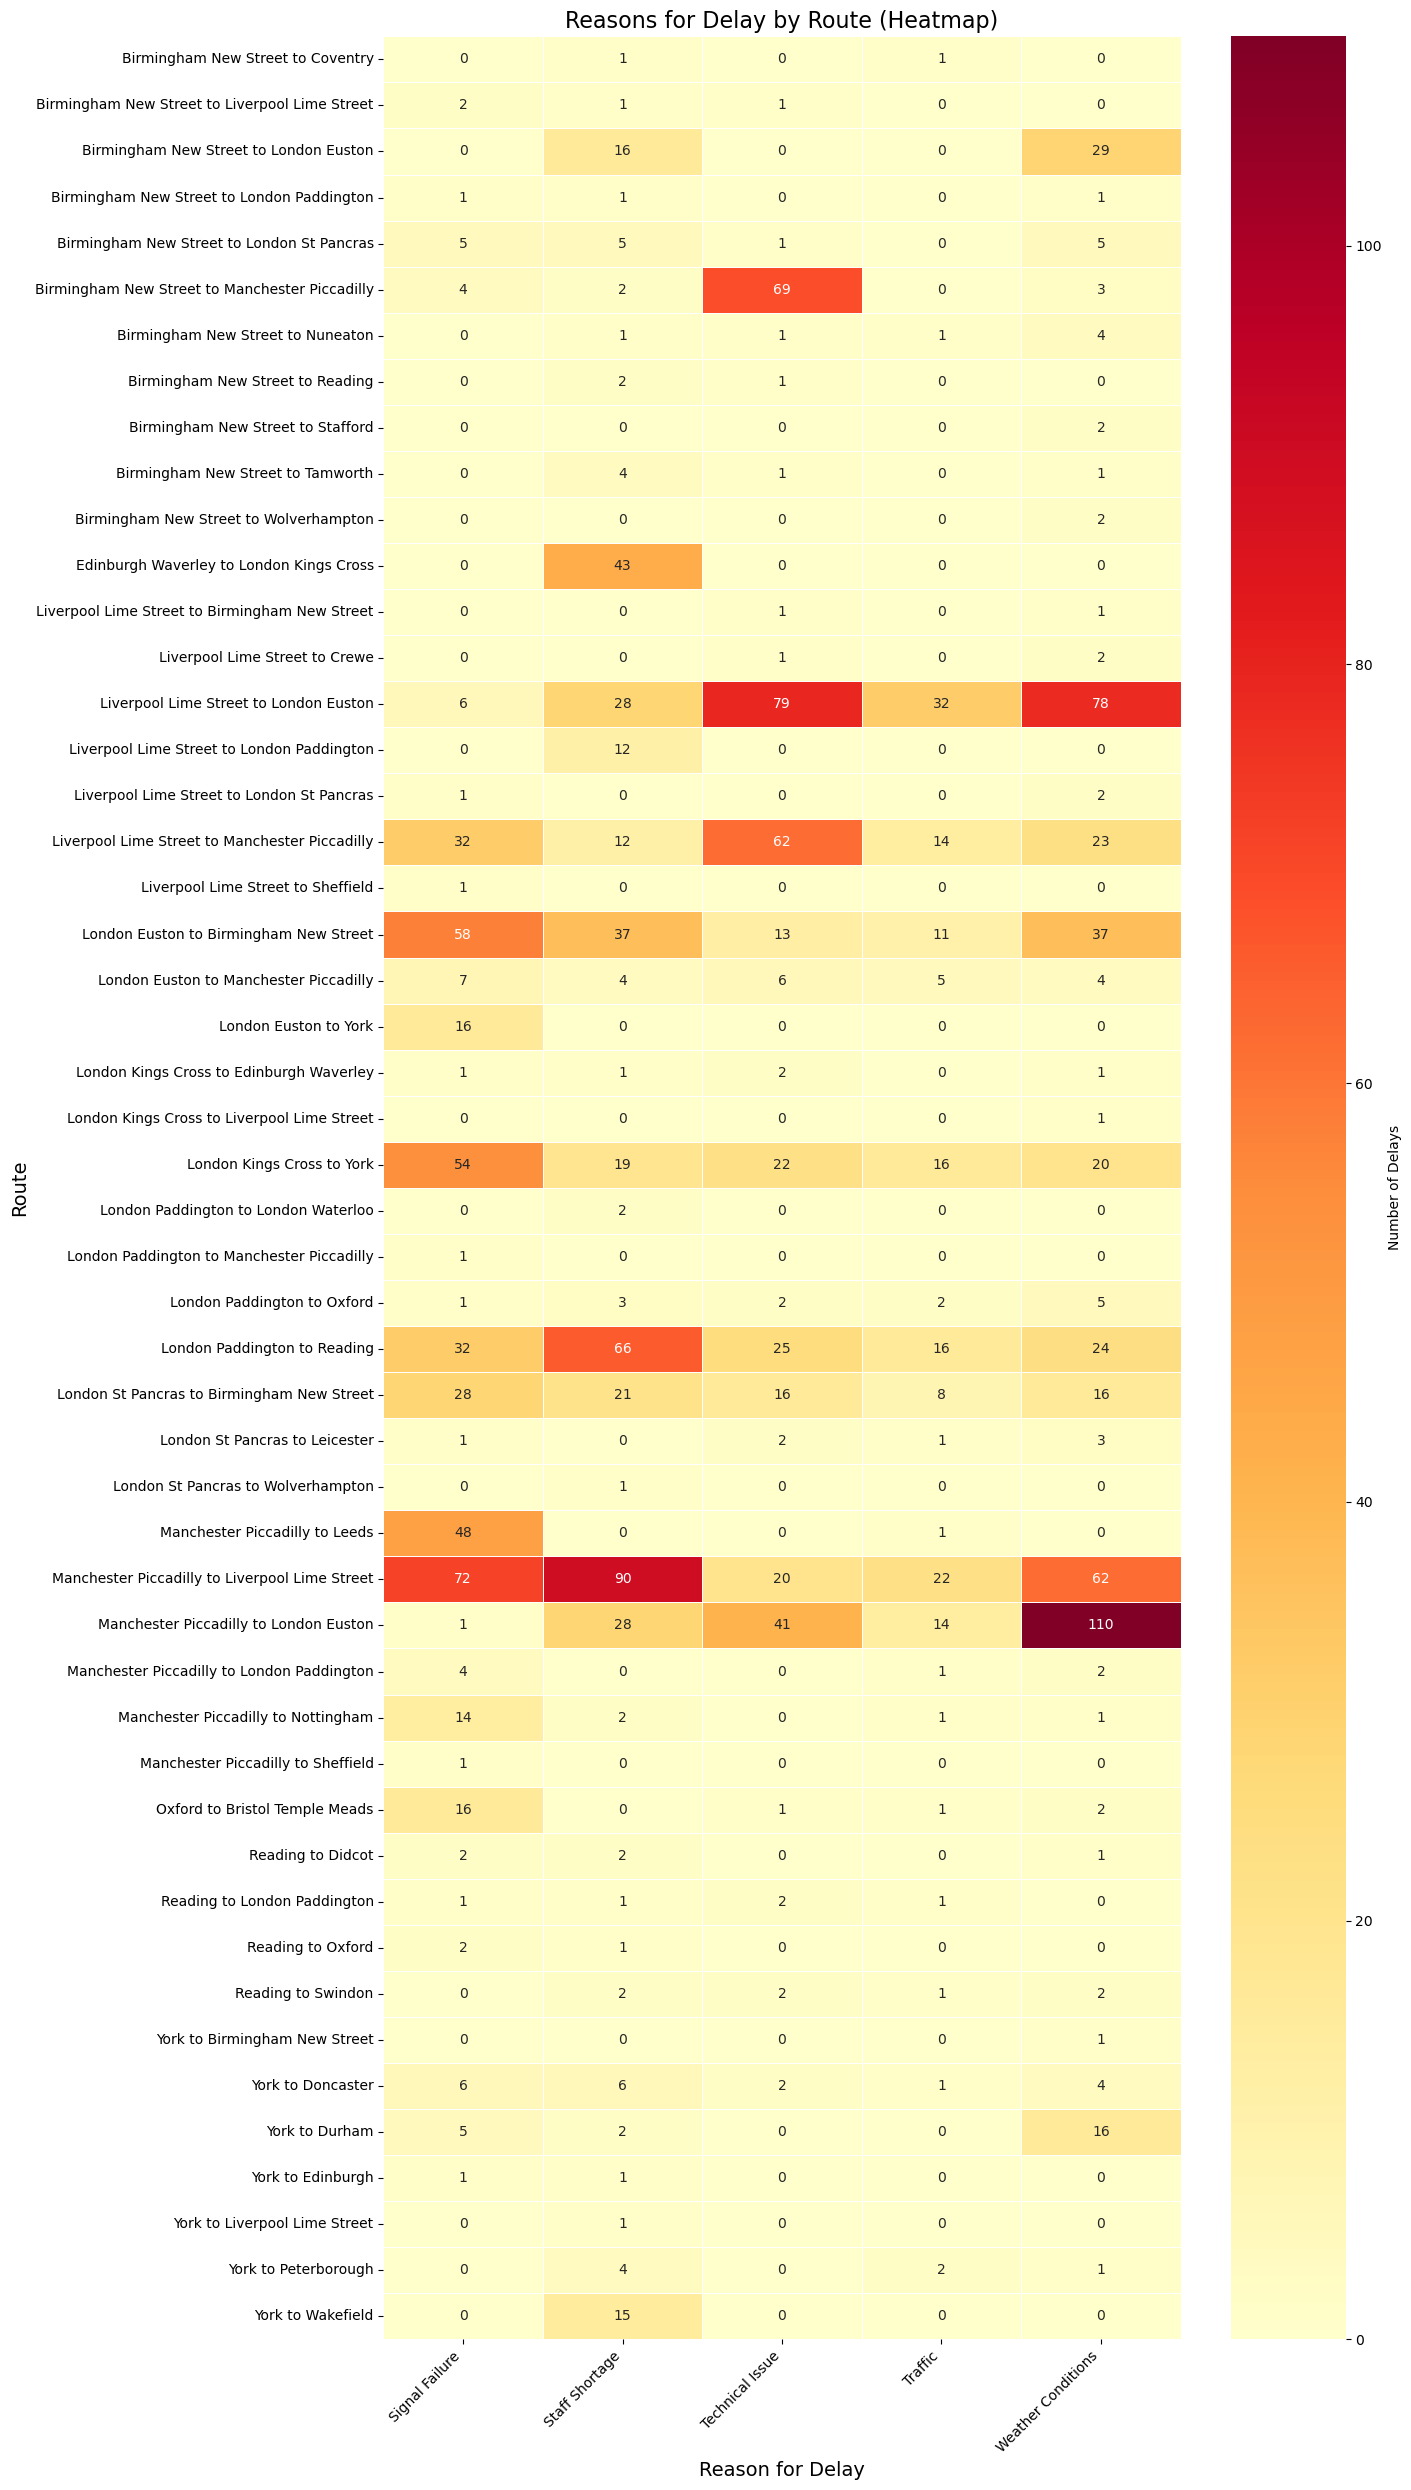

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(14, len(delay_reasons_pivot) * 0.5))  # Adjust height based on number of routes
sns.heatmap(
    delay_reasons_pivot, 
    annot=True, 
    fmt='g',  # Format annotations as integers
    cmap='YlOrRd',  # Color map
    linewidths=0.5,  # Add lines between cells
    cbar_kws={'label': 'Number of Delays'}  # Add a color bar with a label
)

# Customize the plot
plt.title('Reasons for Delay by Route (Heatmap)', fontsize=16)
plt.xlabel('Reason for Delay', fontsize=14)
plt.ylabel('Route', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [70]:
# Calculate total trips for each route
total_trips_by_route = trips.groupby('Route').size().reset_index(name='TotalTrips')

# Merge with delay reasons data
delay_reasons_by_route = pd.merge(delay_reasons_by_route, total_trips_by_route, on='Route', how='left')

# Pivot the data for visualization
delay_reasons_pivot = delay_reasons_by_route.pivot(index='Route', columns='Reason for Delay', values='Count').fillna(0)

In [72]:
# Add TotalTrips to the pivot table
delay_reasons_pivot['TotalTrips'] = total_trips_by_route.set_index('Route')['TotalTrips']

In [74]:
# Create a custom annotation matrix
annot_matrix = delay_reasons_pivot.copy().astype(str)

# Add TotalTrips to the annotation matrix
annot_matrix['TotalTrips'] = delay_reasons_pivot['TotalTrips'].astype(str)

# Replace NaN with empty strings
annot_matrix = annot_matrix.fillna('')

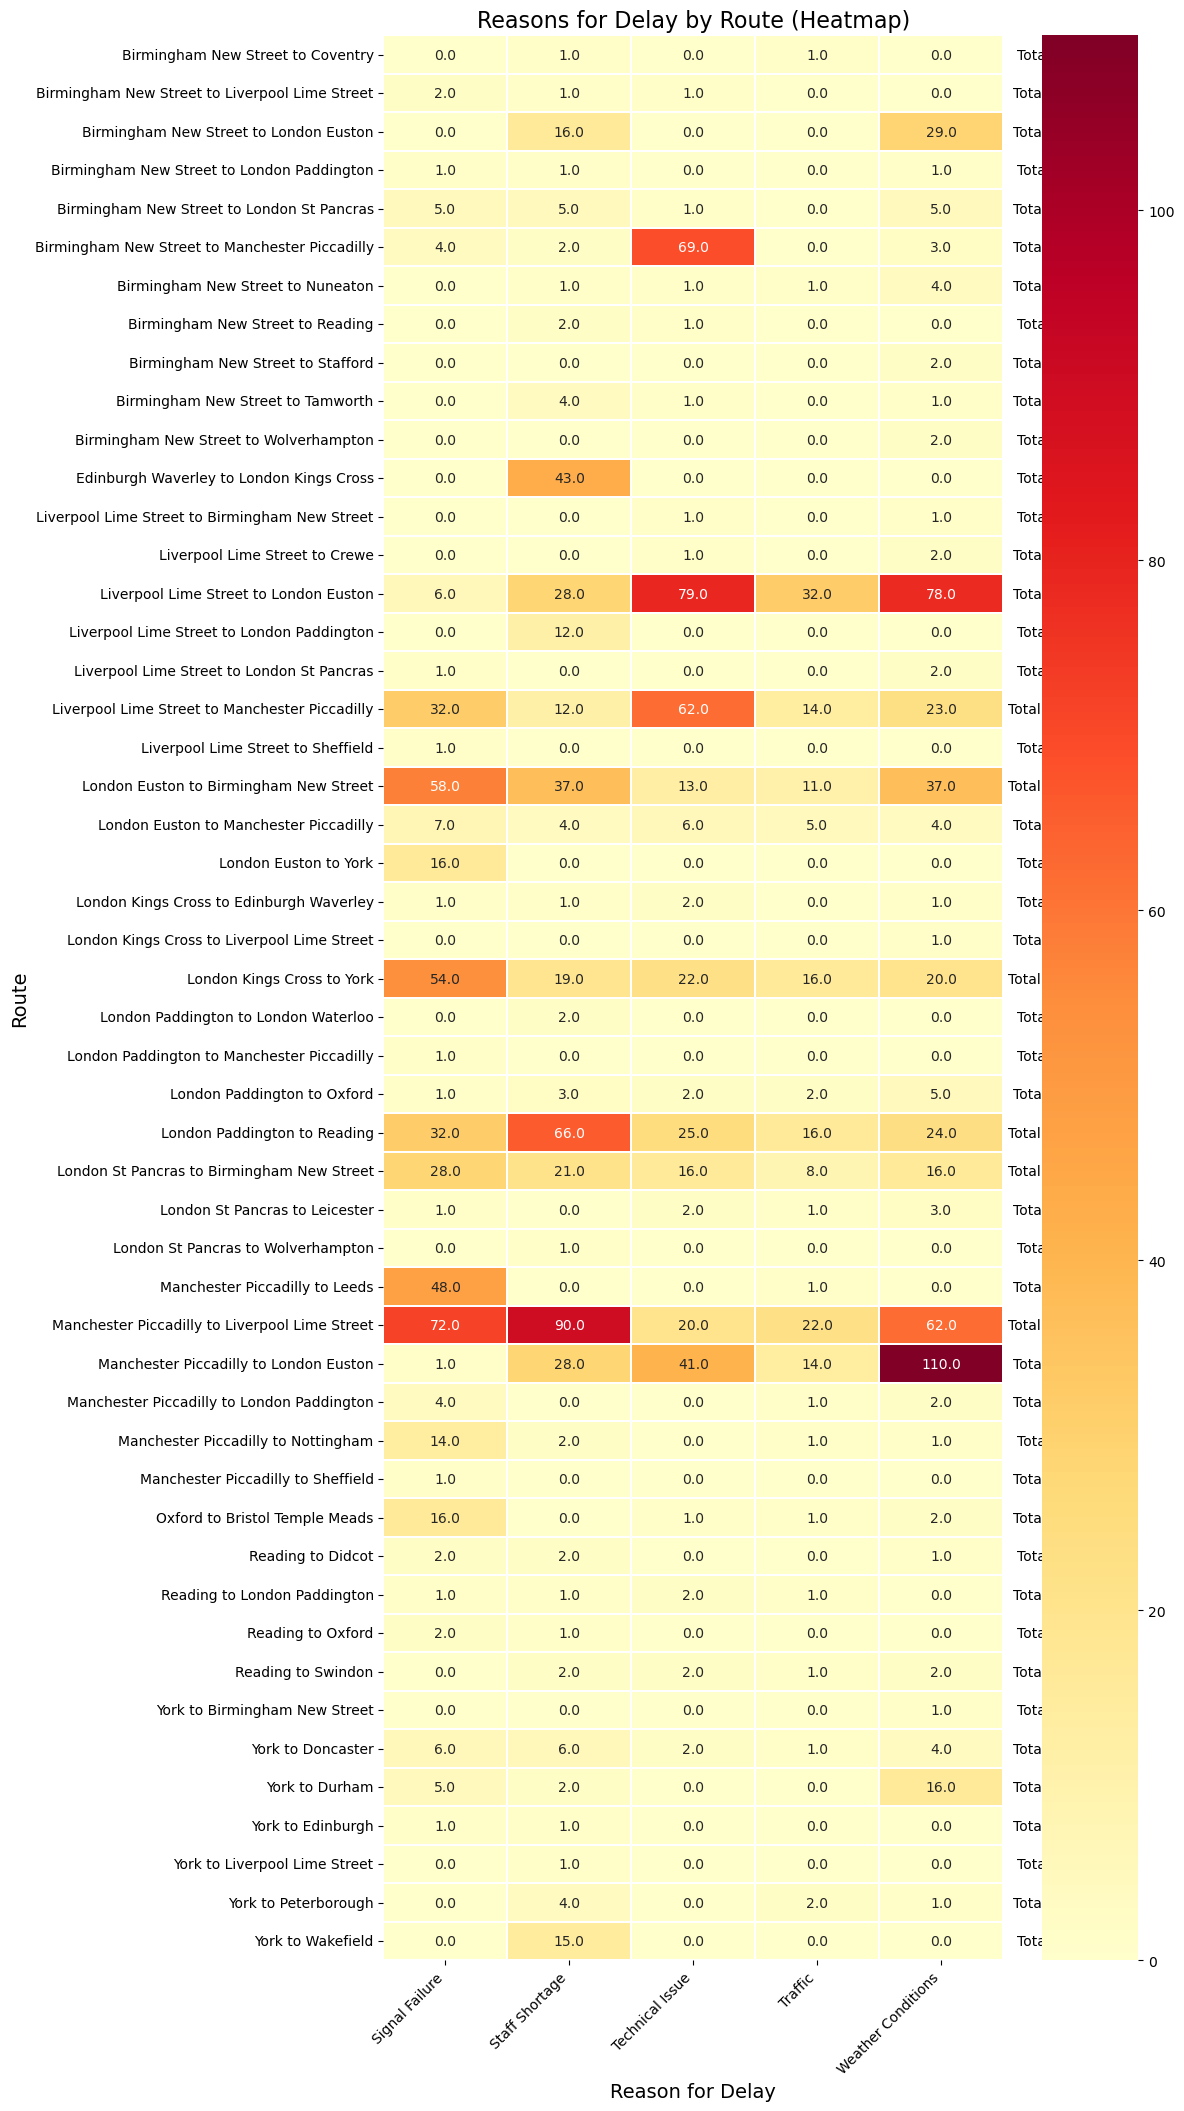

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, len(delay_reasons_pivot) * 0.5))
sns.heatmap(
    delay_reasons_pivot.drop(columns=['TotalTrips']),  # Exclude TotalTrips from the heatmap
    annot=annot_matrix.drop(columns=['TotalTrips']),  # Use custom annotations
    fmt='',  # Disable default annotations
    cmap='YlOrRd', 
    linewidths=0.2,
    cbar_kws={'label': 'Number of Delays'}
)

# Add TotalTrips as a separate column
for i, total_trips in enumerate(delay_reasons_pivot['TotalTrips']):
    plt.text(
        x=delay_reasons_pivot.shape[1] - 0.5,  # Position at the end of the row
        y=i + 0.5,  # Center vertically
        s=f'Total Trips: {total_trips}', 
        ha='center', 
        va='center', 
        fontsize=10
    )

# Customize the plot
plt.title('Reasons for Delay by Route (Heatmap)', fontsize=16)
plt.xlabel('Reason for Delay', fontsize=14)
plt.ylabel('Route', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()